# Simple MNIST convnet

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

## Setup

In [1]:
import numpy as np
from tensorflow import keras
from keras import layers

In [2]:
import matplotlib.pyplot as plt

## Prepare the data

In [3]:
help(keras.datasets.mnist.load_data)

Help on function load_data in module keras.src.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
    
    Args:
      path: path where to cache the dataset locally
        (relative to `~/.keras/datasets`).
    
    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.
    
    **x_test**: uint8 NumPy array of grayscale image data with shapes
      (10000, 28, 28), containing the test data. Pixel values range
      from 0 to 255.
   

In [4]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
input_shape = x_train[0,:,:,:].shape

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
input_shape

(28, 28, 1)

## Build the model

In [6]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),

        # CNN Block 1
        layers.Conv2D(filters=32,
                      kernel_size=(3, 3),
                      activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # CNN Block 2
        layers.Conv2D(filters=64,
                      kernel_size=(3, 3),
                      activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Dense Block
        layers.Flatten(),
        layers.Dense(num_classes,
                     activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

## Train the model

In [8]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 9s 13ms/step - loss: 0.3114 - accuracy: 0.9083 - val_loss: 0.0862 - val_accuracy: 0.9770
Epoch 2/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0856 - accuracy: 0.9735 - val_loss: 0.0611 - val_accuracy: 0.9822
Epoch 3/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0633 - accuracy: 0.9808 - val_loss: 0.0506 - val_accuracy: 0.9840
Epoch 4/15
422/422 [==============================] - 2s 6ms/step - loss: 0.0502 - accuracy: 0.9850 - val_loss: 0.0447 - val_accuracy: 0.9878
Epoch 5/15
422/422 [==============================] - 2s 6ms/step - loss: 0.0429 - accuracy: 0.9870 - val_loss: 0.0415 - val_accuracy: 0.9880
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0362 - accuracy: 0.9889 - val_loss: 0.0420 - val_accuracy: 0.9880
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0320 - accuracy: 0.9903 - val_loss: 0.0437 - val_accuracy: 0.9873
Epoch

## Evaluate the trained model

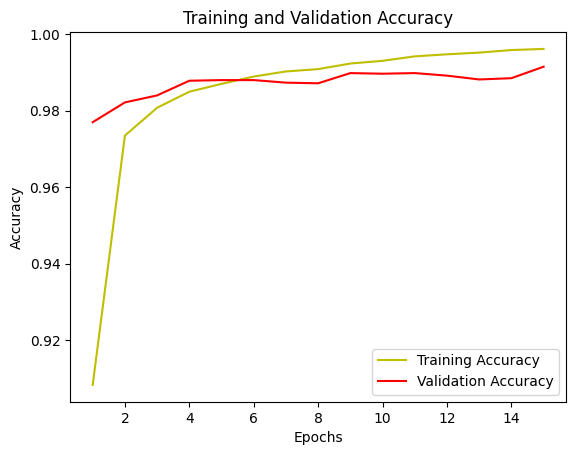

In [9]:
# Training and Validation Accuracy
epochs = range(1, len(history.history["accuracy"]) + 1)
plt.plot(epochs, history.history["accuracy"], 'y', label='Training Accuracy')
plt.plot(epochs, history.history["val_accuracy"], 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# Evaluation on test set
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03386537730693817
Test accuracy: 0.9897000193595886


In [11]:
# Prediction on test set
y_pred = model.predict(x_test)


313/313 [==============================] - 1s 3ms/step


In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [13]:
y_test.shape

(10000, 10)

In [14]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), normalize='pred')

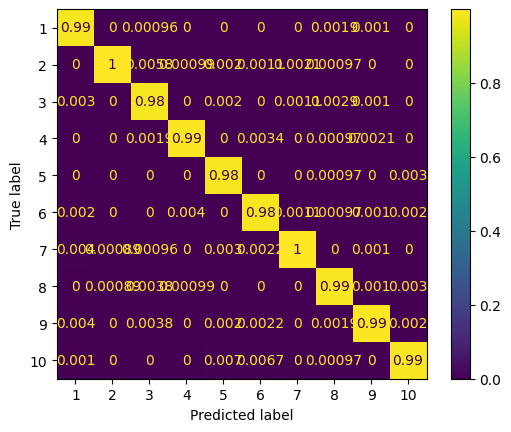

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=np.arange(10)+1,
                               )
disp.plot()